In [1]:
# import shapely
# import geopandas as gpd
import pandas as pd
import numpy as np
# import plotly
# import contextily as cx
# import json
# import shapely
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import matplotlib.lines as lines

In [14]:
df = pd.read_csv("../data/blocks_data_merged.csv")

## K means clustering

In [4]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
data = df.loc[:, ['median_age', 'nearest_hospital_dist', 'nearest_hospital_bed_per_thousand', 'nearest_firestation_dist']]

array([[<Axes: xlabel='median_age', ylabel='median_age'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='median_age'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='median_age'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='median_age'>],
       [<Axes: xlabel='median_age', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='nearest_hospital_dist'>],
       [<Axes: xlabel='median_age', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='nearest_hospital_bed_per_thousand'>],
       [<Axes: xlabel

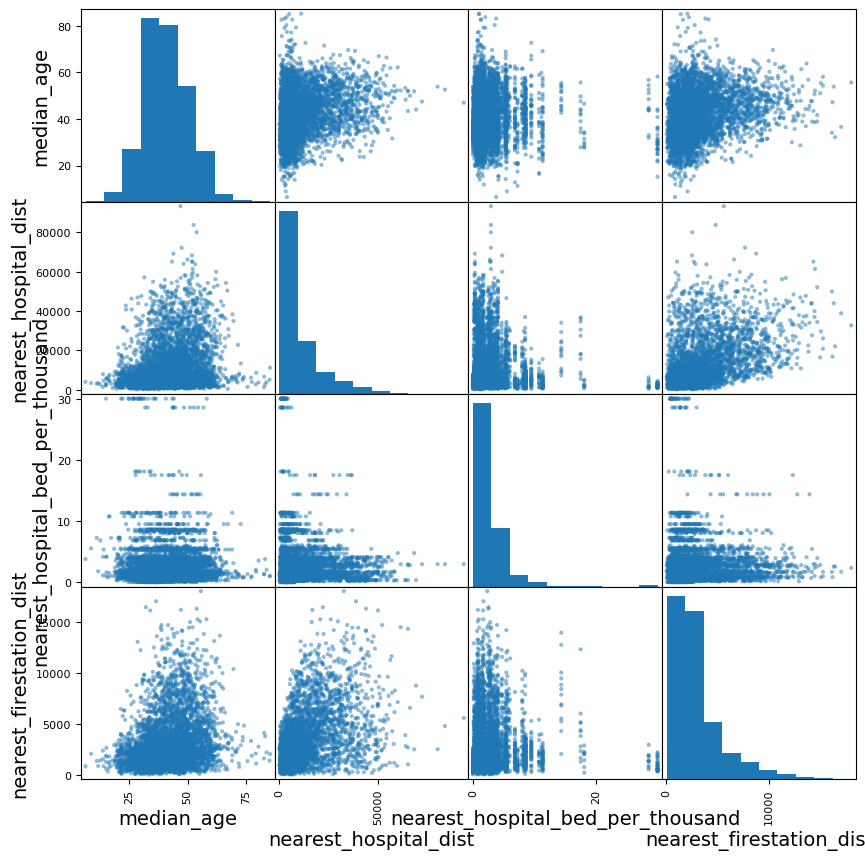

In [6]:
scatter_matrix(data[list(data)], figsize=(10,10))

In [16]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),  # refer to https://stackoverflow.com/questions/54836051/pipeline-ordinalencoder-valueerror-found-unknown-categories
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(data.select_dtypes(include="number").columns)),
        ("cat", cat_pipeline, list(data.select_dtypes(include="object").columns)),
    ])

df = full_pipeline.fit_transform(data)

In [17]:
df.shape

(5554, 4)

In [18]:
from sklearn.cluster import KMeans

num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=0)
kmeans.fit(df)

KMeans(n_init='auto', random_state=0)

In [26]:
scaled_data = pd.DataFrame(df)
scaled_data.columns = data.columns
df_clustered = pd.merge(pd.DataFrame({"cluster": kmeans.labels_}), 
                        scaled_data.rename(columns=lambda x: x+"_scaled"), left_index=True, right_index=True)
report = df_clustered.groupby("cluster").agg(['mean', 'std']).T
report

cluster                                               0         1         2  \
median_age_scaled                        mean  0.638707 -1.103893  0.650542   
                                         std   0.931239  0.443468  0.815584   
nearest_hospital_dist_scaled             mean  2.507720 -0.452525  1.762965   
                                         std   0.953108  0.359303  0.954070   
nearest_hospital_bed_per_thousand_scaled mean -0.249898 -0.220346 -0.065240   
                                         std   0.413242  0.446237  0.643450   
nearest_firestation_dist_scaled          mean  0.220762 -0.476039  2.978662   
                                         std   0.750393  0.419680  0.914610   

cluster                                               3         4         5  \
median_age_scaled                        mean  0.376258 -0.593643 -0.038385   
                                         std   0.767042  1.118426  0.357732   
nearest_hospital_dist_scaled             mean  0.437589 -0.780183 -0.382408   
                                         std   0.573550  0.117988  0.379245   
nearest_hospital_bed_per_thousand_scaled mean -0.086484  8.287973 -0.251262   
                                         std   0.523301  0.203996  0.399628   
nearest_firestation_dist_scaled          mean  1.341496 -0.746907 -0.373409   
                                         std   0.623976  0.262304  0.420717   

cluster                                               6         7  
median_age_scaled                        mean  1.403204 -0.058974  
                                         std   0.644837  0.891081  
nearest_hospital_dist_scaled             mean -0.295874 -0.346242  
                                         std   0.484753  0.584724  
nearest_hospital_bed_per_thousand_scaled mean -0.085551  2.094463  
                                         std   0.501995  0.822778  
nearest_firestation_dist_scaled          mean -0.242975 -0.273398  
                                         std   0.484763  0.608463

In [27]:
df_clustered.to_csv("../data/blocks_clustered.csv")